In [9]:
from qiskit import *
from qiskit.visualization import plot_histogram
import matplotlib
from qiskit_ibm_provider import IBMProvider
import qiskit.tools.jupyter

%matplotlib inline

In [2]:
circuit = QuantumCircuit(2,2)

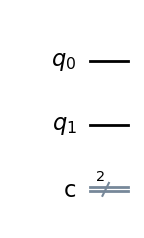

In [3]:
circuit.draw(output='mpl')

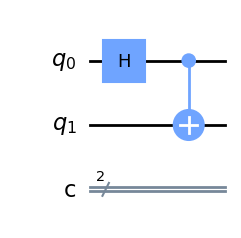

In [4]:
circuit.h(0)
circuit.cx(0,1)
circuit.draw(output='mpl')

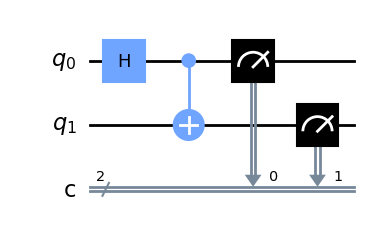

In [5]:
circuit.measure([0,1], [0,1])
circuit.draw(output='mpl')

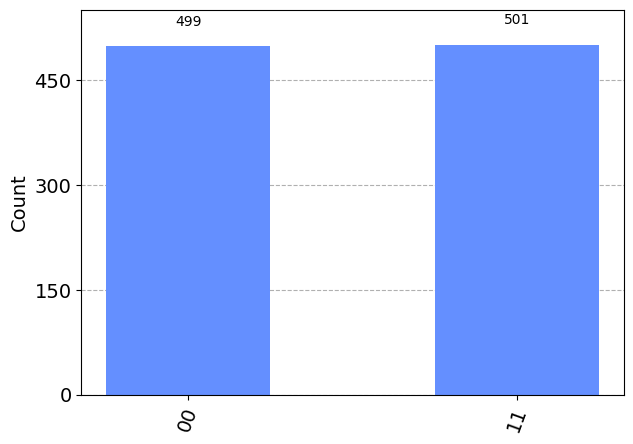

In [6]:
simulator = Aer.get_backend('qasm_simulator')
compiled_circuit = transpile(circuit, simulator)
job = simulator.run(compiled_circuit, shots=1000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(compiled_circuit)
plot_histogram(counts)

In [7]:
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')
provider.backends()

/tmp/ipykernel_95/3520078309.py:1: DeprecationWarning: The package qiskit.providers.ibmq is being deprecated. Please see https://ibm.biz/provider_migration_guide to get instructions on how to migrate to qiskit-ibm-provider (https://github.com/Qiskit/qiskit-ibm-provider) and qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  IBMQ.load_account()
/tmp/ipykernel_95/3520078309.py:1: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.load_account()


[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_jakarta') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_lagos') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_nairo

In [12]:
for backend in provider.backends():
    try:
        qubits_counts = len(backend.properties().qubits)
    except:
        qubits_counts = 'simulated'
    print(f'{backend.name()} : {backend.status().pending_jobs} & {qubits_counts} qubits')

ibmq_qasm_simulator : 0 & simulated qubits
ibmq_lima : 75 & 5 qubits
ibmq_belem : 60 & 5 qubits
ibmq_quito : 5 & 5 qubits
simulator_statevector : 0 & simulated qubits
simulator_mps : 0 & simulated qubits
simulator_extended_stabilizer : 0 & simulated qubits
simulator_stabilizer : 0 & simulated qubits
ibmq_jakarta : 1206 & 7 qubits
ibmq_manila : 1135 & 5 qubits
ibm_lagos : 805 & 7 qubits
ibm_nairobi : 7 & 7 qubits
ibm_perth : 48 & 7 qubits


In [11]:
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job has successfully run


In [10]:
#We will run our circuit on ibmq_quito

quantum_computer = provider.get_backend('ibmq_quito')
%qiskit_job_watcher
job = execute(circuit, backend=quantum_computer)

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

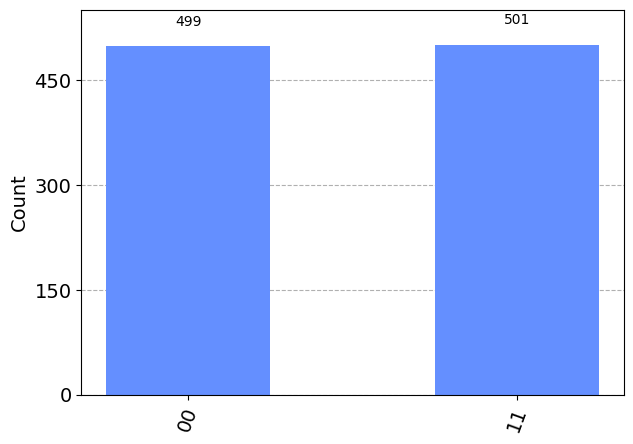

In [13]:
results = job.result()
plot_histogram(result.get_counts(circuit))

In [16]:
%qiskit_disable_job_watcher